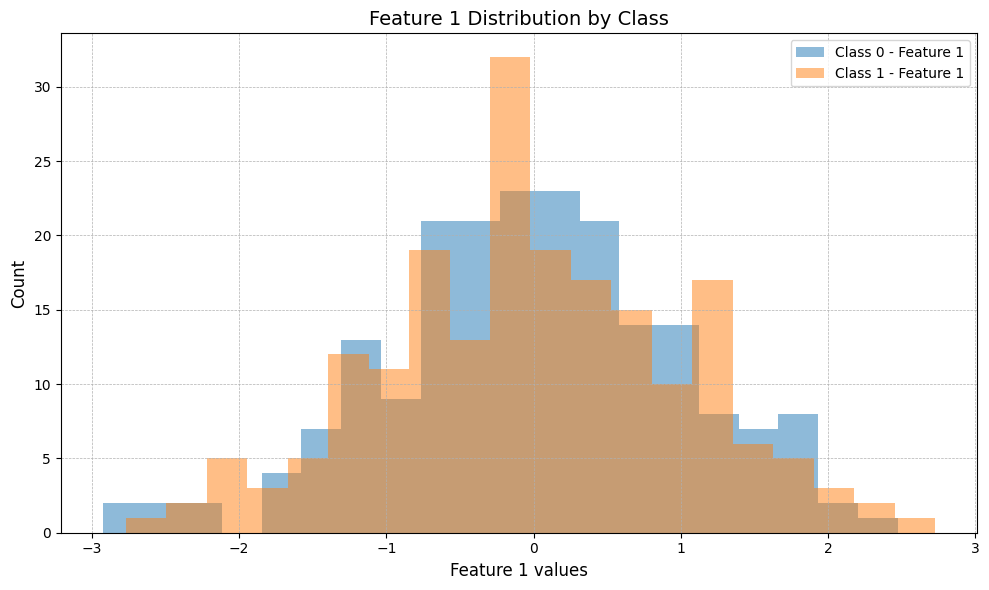

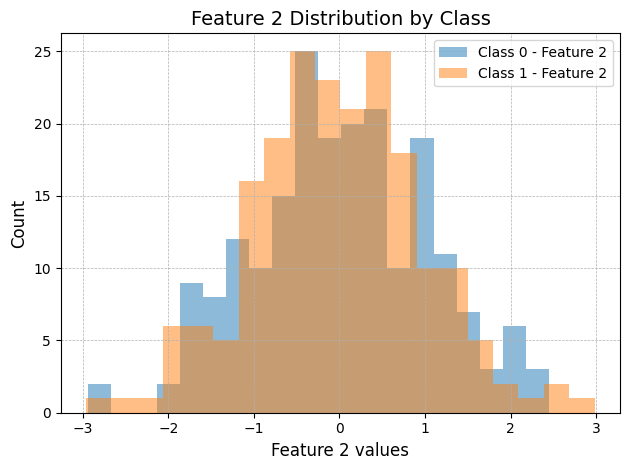

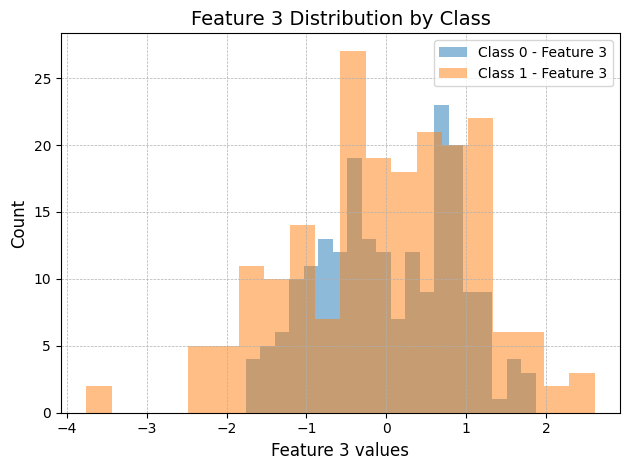

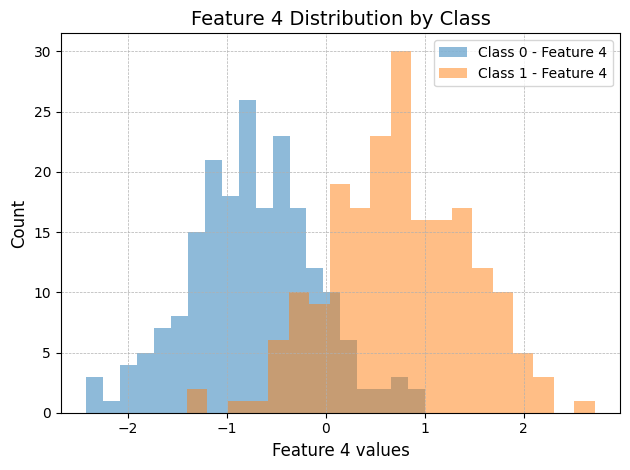

Confusion Matrix:
[[39  7]
 [ 6 48]]
Accuracy: 0.8700
Precision: 0.8727
Recall: 0.8889
F1 Score: 0.8807


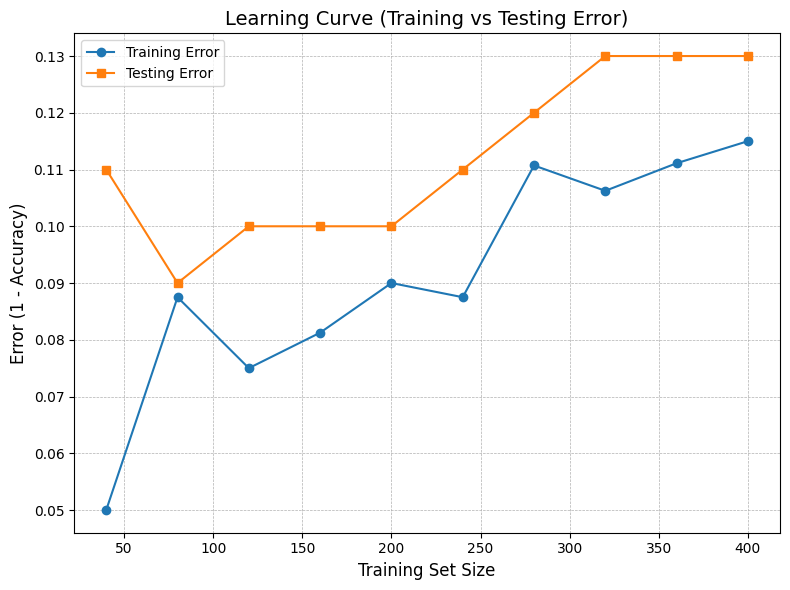

In [1]:
# Naive Bayes (Binary Classification) with Evaluation Metrics and Learning Curve
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Evaluation metrics
def evaluate_model(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

# Step 2: Plot feature distribution
def plot_feature_distribution(X_train, y_train):
    plt.figure(figsize=(10, 6))
    for feature_idx in range(X_train.shape[1]):
        plt.hist(X_train[y_train == 0][:, feature_idx], bins=20, alpha=0.5, label=f'Class 0 - Feature {feature_idx+1}')
        plt.hist(X_train[y_train == 1][:, feature_idx], bins=20, alpha=0.5, label=f'Class 1 - Feature {feature_idx+1}')
        plt.title(f'Feature {feature_idx+1} Distribution by Class', fontsize=14)
        plt.xlabel(f'Feature {feature_idx+1} values', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(loc='upper right')
        plt.grid(True, linestyle='--', linewidth=0.5)
        plt.tight_layout()
        plt.show()

# Step 3: Plot learning curve (Training & Testing error)
def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    test_errors = []

    for frac in train_sizes:
        size = int(frac * len(X_train))
        X_subset = X_train[:size]
        y_subset = y_train[:size]

        model.fit(X_subset, y_subset)

        # Training error
        y_train_pred = model.predict(X_subset)
        train_error = 1 - accuracy_score(y_subset, y_train_pred)
        train_errors.append(train_error)

        # Testing error
        y_test_pred = model.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_test_pred)
        test_errors.append(test_error)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes * len(X_train), train_errors, label='Training Error', marker='o')
    plt.plot(train_sizes * len(X_train), test_errors, label='Testing Error', marker='s')
    plt.xlabel('Training Set Size', fontsize=12)
    plt.ylabel('Error (1 - Accuracy)', fontsize=12)
    plt.title('Learning Curve (Training vs Testing Error)', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def main():
    # Step 4: Generate synthetic binary classification data
    X, y = make_classification(n_samples=500, n_features=4, n_informative=2, 
                                n_redundant=0, n_classes=2, random_state=42)

    # Step 5: Train/test split (single-fold cross-validation)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 6: Feature scaling (important for Naive Bayes with continuous features)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Step 7: Plot feature distributions
    plot_feature_distribution(X_train_scaled, y_train)

    # Step 8: Train Naive Bayes model
    model = GaussianNB()
    model.fit(X_train_scaled, y_train)

    # Step 9: Predictions
    y_pred = model.predict(X_test_scaled)

    # Step 10: Evaluation
    evaluate_model(y_test, y_pred)

    # Step 11: Plot Learning Curve (Training & Testing error)
    plot_learning_curve(GaussianNB(), X_train_scaled, y_train, X_test_scaled, y_test)

if __name__ == "__main__":
    main()
